In [1]:
#IPython is what you are using now to run the notebook
import IPython
print( "IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with arrays and matrices
import numpy as np
print( "Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print( "SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print( "Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib.pyplot as plt  
from pylab import *
print( "Mapltolib version:    %6.6s (need at least 1.2.1)" %
       matplotlib.__version__)
%matplotlib inline
# necessary for in-line graphics

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print( "Scikit-Learn version: %6.6s (need at least 0.13.1)" %
       sklearn.__version__)
import os


# for certain system-related functions

from scipy import stats

import statsmodels.formula.api as smf


IPython version:       7.6.1 (need at least 1.0)
Numpy version:        1.16.4 (need at least 1.7.1)
SciPy version:         1.2.1 (need at least 0.12.0)
Pandas version:       0.24.2 (need at least 0.11.0)
Mapltolib version:     3.1.0 (need at least 1.2.1)
Scikit-Learn version: 0.21.2 (need at least 0.13.1)


**1. Explore and prepare the data (20pt)**

***Q1.1 Load the data. How many responses and variables do we have?***

In [2]:
data = pd.read_csv("wvs.csv", sep='\t')

In [3]:
data.shape

(90350, 328)

There are 90350 rows of data, and there are 328 variables

***Q1.2 Create a summary table over all responses for V204: is abortion justifiable. How many non-
missing responses (i.e. positive answers) do you find? Describe the the opinion about the abortion
among the global pool of respondents.***

In [4]:
data.V204.describe()

count    90350.000000
mean         2.946386
std          2.964040
min         -5.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         10.000000
Name: V204, dtype: float64

This gives the summary statistics for V204 column

In [5]:
data[data['V204'] >=1].shape

(85742, 328)

We took the number of rows for which V204 > = 0.
There are 85742 non missing (positive) responses in V204.

In [6]:
#We would plot a bar graph for non missing values to view the global opinion

v204_non_missing_entries = data[data['V204'] >= 1]['V204']
v204_non_missing_entries.value_counts()

1     40227
5      9580
2      7896
3      6294
4      4497
6      4395
10     4067
7      3493
8      3397
9      1896
Name: V204, dtype: int64

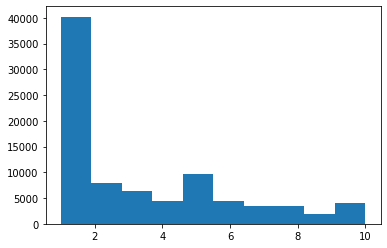

In [7]:
plt.hist(v204_non_missing_entries, bins=10);

Among the global population, around 40000 (almost 50 %) respondents find abortion never justfiable.
The rest of population is divided amoing their views. 
Only around 4000 respondednts find abortion always justifiable.

***Q1.3.a- remove everything that are not positive integers for V204 and V2 (country).***

In [8]:
#We areselecting only those rows having V024 >= 0; saving result in data1
data1 = data[(data['V204'] >=1) & (data['V2'] >=1)]

In [9]:
data1.shape

(85742, 328)

***Q1.3.b- for all other variables, remove the missings in the sense of missing value on computer. You may
leave negative answers in the data, otherwise I am afraid your sample size collapses.
What is the final number of observations?***

In [10]:
#We are dropping na values from all the columns; saving result in data2
data2 = data1.dropna()

In [11]:
data2.shape

(79267, 328)

In the final data frame, we have got 79267 rows of 328 columns.

***Q1.4- In order to simplify the analysis below, create a new binary variable abortion as:
abortion = 1 for V204>3; 0 otherwise***

In [12]:
#We add another column abortion; if V204 >1 then abortion = 1; otherwise abortion = 0
data2['abortion'] = (data2.V204 > 3).astype('int')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
#We are dropping the V204 column as abortion column is formed from it
del data2['V204']

In [14]:
data2.shape

(79267, 328)

***Q1.5 Compute (pearson) correlation table between abortion and all other variables in the data.
There are many of these!
Present these variables in descending order according to the absolute value of the correlation. It
might look something like:***

In [15]:
#Finding corelation coefficients, its output is a series
table_coef = data2[data2.columns[0:]].corr()['abortion'][:]

In [16]:
table_coef

V2            0.038487
V4            0.051921
V5           -0.028951
V6           -0.070634
V7            0.003503
V8            0.075076
V9            0.314117
V10           0.020985
V11           0.025678
V12          -0.077677
V13           0.069135
V14          -0.039786
V15          -0.059785
V16          -0.012139
V17          -0.001757
V18          -0.057148
V19           0.249042
V20           0.031246
V21           0.147118
V22          -0.071474
V23          -0.005926
V24          -0.102798
V25          -0.078377
V26           0.095885
V27           0.060138
V28           0.076576
V29           0.061569
V30           0.026956
V31           0.072616
V32           0.048753
                ...   
V258A        -0.019390
V265          0.042229
Y001          0.091519
Y002          0.049405
MN_163A      -0.092610
MN_163C      -0.094865
MN_228L      -0.092581
MN_228M      -0.094463
MN_228N      -0.094901
MN_228O      -0.095165
MN_228P      -0.093948
MN_228Q      -0.086341
MN_228R    

In [17]:
#converting the series to a dataframe
table_coef1 = table_coef.to_frame()

In [18]:
type(table_coef1)

pandas.core.frame.DataFrame

In [19]:
#resetting the index
table_coef1.reset_index(level=0, inplace=True)

In [20]:
#naming the columns corectly
table_coef1 = table_coef1.rename(columns={"index": "variable", "abortion": "correlation"})

In [21]:
table_coef1.head(10)

,variable,correlation
0,V2,0.038487
1,V4,0.051921
2,V5,-0.028951
3,V6,-0.070634
4,V7,0.003503
5,V8,0.075076
6,V9,0.314117
7,V10,0.020985
8,V11,0.025678
9,V12,-0.077677


In [22]:
#We are sorting according to the descending order of absolute value of correlataion column. We wuld let the poistive be positive and negative as negative

table_coef2 = table_coef1.iloc[(-table_coef1['correlation'].abs()).argsort()]

In [23]:
table_coef2.head(10)

,variable,correlation
327,abortion,1.000000
228,V205,0.548653
226,V203,0.485419
229,V206,0.446394
230,V207,0.418271
165,V152,-0.315280
6,V9,0.314117
227,V203A,0.291576
159,V146,0.272220
234,V210,0.257035


In the above table we have both positive and negative values. of the absoluite value sorted in descending order. If the correlation is -1, it means perfect negavtive linear corelation. If corelation is 1, it means perfect positive linear correlation.
If the correlation is 0, it means no linear correlation.


abortion has corelation 1 with itself. 

V205, V203 and V206 have corelation around 0.5, which means they are somewhat linearly correlated with abortion.

***Q1.6 convert country code V2 into dummies. First rename V2 to country. Thereafter use pd.get_dummies
along these lines:data2 = pd.get_dummies(data, columns = ['country'])
Afterwards, remove country variable from the data. How many rows/columns do you have now?
How many country dummies does the data contain?
Note that get_dummies creates a dummy for every category, so you have to remove one of these
dummies in order to avoid perfect multicollinearity.***

In [24]:
data2.shape

(79267, 328)

In [25]:
data2.V2.unique()

array([ 12,  32,  51,  36,  31,  48, 112,  76, 170, 196, 152, 156, 218,
       233, 268, 276, 288, 344, 356, 368, 392, 400, 398, 417, 422, 434,
       458, 484, 504, 528, 554, 566, 586, 275, 604, 608, 616, 634, 642,
       643, 646, 702, 705, 410, 710, 724, 752, 158, 764, 780, 788, 792,
       804, 840, 858, 860, 887, 716], dtype=int64)

In [26]:
data3 = data2.copy()

In [27]:
#renaming V2 to country
data3.rename(columns = {'V2':'country'}, inplace = True) 

In [28]:
data3.country.unique()

array([ 12,  32,  51,  36,  31,  48, 112,  76, 170, 196, 152, 156, 218,
       233, 268, 276, 288, 344, 356, 368, 392, 400, 398, 417, 422, 434,
       458, 484, 504, 528, 554, 566, 586, 275, 604, 608, 616, 634, 642,
       643, 646, 702, 705, 410, 710, 724, 752, 158, 764, 780, 788, 792,
       804, 840, 858, 860, 887, 716], dtype=int64)

In [29]:
#Our data frame is data2. we would convert V2 into dummies and save in a dataframe data3
data3 = pd.get_dummies(data3, columns = ['country'])

In [30]:
data3.shape

(79267, 385)

We converted the country variable to dummy variables. It removed the country variable. The dataframe has 79267 rows and 386 columns

In [31]:
data3.columns

Index(['V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13',
       ...
       'country_752', 'country_764', 'country_780', 'country_788',
       'country_792', 'country_804', 'country_840', 'country_858',
       'country_860', 'country_887'],
      dtype='object', length=385)

In [32]:
#We have to remove one of the dummy variables, so we would remove country_780
del data3['country_780']

In [33]:
data3.shape

(79267, 384)

When we have removed one of the columns of country dummy variables, we have 79267 rows and 385 columns.

**2. Implement Cross-Validation (40pt)**

***Q2.1- Make it as a function that takes k, the (unfitted) model, features X and the target y as
arguments.***

In [37]:
def cross_validation3(k, unfitted_model, X, y):
    
    num_rows = X.shape[0] #finding the number of rows
    
    index_list = X.index.values.tolist() #taking a list of all the indices
    np.random.seed(2) #setting a seed for shuffling
    
    np.random.shuffle(index_list) #shuffling the list of indices
    
    num_folds = k
    num_elem_each_fold = int(len(index_list)/k) #find number of elements in each fold
    folds = [list(t) for t in zip(*[iter(index_list)]*num_elem_each_fold)] #split list of indices into k folds
    accuracy_list = [] #creating an empty list for storing model accuracy
    f_score_list = [] #creating an empty list for storing f score

    for fold in folds: #repeat for every splits
        
        val_indices = fold #validation indices = values 
        train_indices = np.setdiff1d(index_list, val_indices) #training indices
        X_val = X[X.index.isin(val_indices)]
        y_val = y[y.index.isin(val_indices)]['abortion']
        X_train = X[X.index.isin(train_indices)]
        y_train = y[y.index.isin(train_indices)]['abortion']
        
        
    


    

        model = unfitted_model.fit(X_train, y_train) #fitting the model

        y_pred = model.predict(X_val) #predicting the outcome on X_val
        #y_pred1 = y_pred[:,1]
    
       

        model_accuracy = sklearn.metrics.accuracy_score(y_val, y_pred) #measuring the accuracy on y_val and y_pred
        model_Fscore = sklearn.metrics.f1_score(y_val, y_pred, average='macro') #measuring the F score

        accuracy_list.append(model_accuracy) #adding to the list of accuracy
        f_score_list.append(model_Fscore)
        
    mean_accuracy = np.mean(accuracy_list) #finding the mean of accuracy
    mean_Fscore = np.mean(f_score_list) #finding the mean of f score
    
    
    print("The mean accuracy and F score are as following: ")
    return (mean_accuracy, mean_Fscore)

      

**3. Find the best model (40)**

**3.1 k-NN (13pt)**

***Q3.1.1- Separate your training data into X (features), and y (target). Target will be the abortion
variable, X are all the other features.***

In [38]:
data4 = data3.copy()

In [39]:
data4.shape

(79267, 384)

In [40]:
data4.reset_index(inplace=True)

In [41]:
np.random.seed(2)

#selecting random sample of 5000 rows
df_features_target = data4.sample(n = 5000) 

In [42]:
#Selecting the first 5000 rows of the data frame
#df_features_target = data4.head(5000)

In [43]:
#We are taking X as all the columns except abortion
X = df_features_target.loc[:, df_features_target.columns != 'abortion']
X.reset_index(inplace = True)

In [44]:
#selecting opnly the abortion column for y
y = df_features_target[['abortion']]
y.reset_index(inplace= True)

In [45]:
#We would normalise the X
from sklearn import preprocessing
X_norm = pd.DataFrame(preprocessing.normalize(X))

X_norm.reset_index(inplace=True)

***Q3.1.2- pick a k and set up the k-NN model with 10 nearest neighbours. Use your freshly-minted CV routine to cross-validate
accuracy and F-score of your k-NN model.***

In [46]:
#We would do for 10 neighbors
from sklearn.neighbors import KNeighborsClassifier
unfitted_model = KNeighborsClassifier(n_neighbors=10)

In [47]:
output = cross_validation3(5, unfitted_model, X_norm, y) #5 is for 5 fold cross validation
output

The mean accuracy and F score are as following: 


(0.6092, 0.4500760734976077)

***Q3.1.3- Try a few different k-NN models (pick different k, choose to normalize/not-to-normalize your
features).***

Now that we have taken 5000 rows; and proven our function is working for running the model, we would do kNN for different number of nearest neighbours.

In [48]:

from sklearn.neighbors import KNeighborsClassifier

#Let us try kNN for normalised data
k_list = [2,3,4,5,6,7,8,9,10]

for k in k_list:
    unfitted_model = KNeighborsClassifier(n_neighbors=k)
    print("The number of nearest neighbours in KNN: {}".format(k))
    output = cross_validation3(5, unfitted_model, X_norm, y) #5 is for 5 fold cross validation
    print(output)

The number of nearest neighbours in KNN: 2
The mean accuracy and F score are as following: 
(0.5944, 0.45420088151910976)
The number of nearest neighbours in KNN: 3
The mean accuracy and F score are as following: 
(0.5624, 0.5008931093480214)
The number of nearest neighbours in KNN: 4
The mean accuracy and F score are as following: 
(0.6018000000000001, 0.46471252174689737)
The number of nearest neighbours in KNN: 5
The mean accuracy and F score are as following: 
(0.5771999999999999, 0.4998700264822382)
The number of nearest neighbours in KNN: 6
The mean accuracy and F score are as following: 
(0.611, 0.4671740866230684)
The number of nearest neighbours in KNN: 7
The mean accuracy and F score are as following: 
(0.5837999999999999, 0.49185207178743645)
The number of nearest neighbours in KNN: 8
The mean accuracy and F score are as following: 
(0.6126, 0.4604461329648669)
The number of nearest neighbours in KNN: 9
The mean accuracy and F score are as following: 
(0.5882, 0.478492955672

We computed accuracy and F-score for different values of k in KNN for normalised data. We got the best result for k = 2

In [49]:

from sklearn.neighbors import KNeighborsClassifier

#Let us try kNN for non-normalised data
k_list = [2,3,4,5,6,7,8,9,10]

for k in k_list:
    unfitted_model = KNeighborsClassifier(n_neighbors=k)
    print("The number of nearest neighbors in kNN: {}".format(k))
    output = cross_validation3(5, unfitted_model, X, y) #5 is for 5 fold cross validation
    print(output)

The number of nearest neighbors in kNN: 2
The mean accuracy and F score are as following: 
(0.694, 0.6148606653531572)
The number of nearest neighbors in kNN: 3
The mean accuracy and F score are as following: 
(0.6746000000000001, 0.6378831461975375)
The number of nearest neighbors in kNN: 4
The mean accuracy and F score are as following: 
(0.6988000000000001, 0.6324702579596131)
The number of nearest neighbors in kNN: 5
The mean accuracy and F score are as following: 
(0.6826000000000001, 0.6421137301006175)
The number of nearest neighbors in kNN: 6
The mean accuracy and F score are as following: 
(0.6961999999999999, 0.6336763666304208)
The number of nearest neighbors in kNN: 7
The mean accuracy and F score are as following: 
(0.6912, 0.6492768769906574)
The number of nearest neighbors in kNN: 8
The mean accuracy and F score are as following: 
(0.7034, 0.6451702451611647)
The number of nearest neighbors in kNN: 9
The mean accuracy and F score are as following: 
(0.6992, 0.65546155559

We computed accuracy and F-score for different values of k in KNN for non normalised data. We got the best result for k = 10

***Q3.1.4- Present the results from your best k-NN model. Note: as you are using two metrics here, you
may end up with different models performing better according to different measures.***

We took kNN for normalised and non normalised data for different values of k in the above codes.
We computed accuracy and F-score for different values of k in KNN for normalised data. We got the best result for k = 9.
We computed accuracy and F-score for different values of k in KNN for non normalised data. We got the best result for k = 5

***Q3.2.1- Now repeat the process above with logistic regression. As we have a myriad of features anyway, we
are not going to do any feature engineering. Just a plain logistic regression.***

In [50]:
from sklearn.linear_model import LogisticRegression
unfitted_model = LogisticRegression(solver='liblinear') 

In [51]:
print("We are doing logistic regression")
output = cross_validation3(10, unfitted_model, X, y) 

output

We are doing logistic regression
The mean accuracy and F score are as following: 


(0.8252, 0.8054950075106518)

**Q3.3 Now repeat the process with support vector machines while choosing between a few dierent kernels and
kernel options, such as degree for polynomial kernels.
Hint: I have mixed experience with sklearn version of SVM. I recommend to limit the number of
iterations, initially maybe to just 1000, in order to ensure your model actually terminates.**

***Q3.3.1 pick a kernel and repeat the process above.
Note that some kernels are slower than others, so be careful.***

We would initially try SVM on normalised data

In [73]:
#We are doing SVM on linear kernel, and normalised data

from sklearn.svm import SVC 
from sklearn.ensemble import BaggingClassifier


#The algorithm kept on running, so I have used the BaggingClassifier, n_jobs features.

unfitted_model = BaggingClassifier(base_estimator=SVC(kernel='linear',max_iter=1000),n_estimators=10, random_state=0,n_jobs = -1)

print("We are doing SVM for linear kernel and normalised data")
output = cross_validation3(5, unfitted_model, X_norm, y) 

output



We are doing SVM for linear kernel and normalised data
The mean accuracy and F score are as following: 


(0.526, 0.46321582985176574)

In [74]:

#We are doing SVM on radial kernel and normalised data

from sklearn.svm import SVC 
from sklearn.ensemble import BaggingClassifier


#The algorithm kept on running, so I have used the BaggingClassifier, n_jobs features.

unfitted_model = BaggingClassifier(base_estimator=SVC(kernel='rbf', gamma=5 ,max_iter=1000),n_estimators=10, random_state=0,n_jobs = -1)

print("We are doing SVM for radial kernel and normalised data")
output = cross_validation3(5, unfitted_model, X_norm, y) 

output


We are doing SVM for radial kernel and normalised data


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The mean accuracy and F score are as following: 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.6412, 0.3906425335041429)

In [54]:

#We would now try with polynomial kernel of degree 2 and normalised data

from sklearn.svm import SVC 
from sklearn.ensemble import BaggingClassifier

#unfittedmodel = SVC(max_iter=1000)

#The algorithm kept on running, so I have used the BaggingClassifier, n_jobs features.

unfitted_model = clf = BaggingClassifier(base_estimator=SVC(kernel='poly', degree=2,max_iter=1000),n_estimators=10, random_state=0,n_jobs = -1)

print("We are doing SVM for polynomial kernel of degree 2 and normalised data")
output = cross_validation3(5, unfitted_model, X_norm, y) 

output


We are doing SVM for polynomial kernel of degree 2 and normalised data
The mean accuracy and F score are as following: 


(0.5902000000000001, 0.4707015434449785)

In [55]:
#We would now try with polynomial kernel of degree 3 and normalised data

from sklearn.svm import SVC 
from sklearn.ensemble import BaggingClassifier

#unfittedmodel = SVC(max_iter=1000)

#The algorithm kept on running, so I have used the BaggingClassifier, n_jobs features.

unfitted_model = clf = BaggingClassifier(base_estimator=SVC(kernel='poly', degree=3,max_iter=1000),n_estimators=10, random_state=0,n_jobs = -1)

print("We are doing SVM for polynomial kernel of degree 3 and normalised data")
output = cross_validation3(5, unfitted_model, X_norm, y) 

output


We are doing SVM for polynomial kernel of degree 3 and normalised data
The mean accuracy and F score are as following: 


(0.5618000000000001, 0.4816606796676874)

We would now do SVM on non-normalised data.

In [56]:
#We are doing SVM on linear kernel, and non normalised data

from sklearn.svm import SVC 
from sklearn.ensemble import BaggingClassifier


#The algorithm kept on running, so I have used the BaggingClassifier, n_jobs features.

unfitted_model = BaggingClassifier(base_estimator=SVC(kernel='linear',max_iter=1000),n_estimators=10, random_state=0,n_jobs = -1)

print("We are doing SVM for linear kernel and non normalised data")
output = cross_validation3(5, unfitted_model, X, y) 

output



We are doing SVM for linear kernel and non normalised data
The mean accuracy and F score are as following: 


(0.5045999999999999, 0.47756928268930904)

In [75]:

#We are doing SVM on radial kernel and non normalised data

from sklearn.svm import SVC 
from sklearn.ensemble import BaggingClassifier


#The algorithm kept on running, so I have used the BaggingClassifier, n_jobs features.

unfitted_model = BaggingClassifier(base_estimator=SVC(kernel='rbf', gamma=5 ,max_iter=1000),n_estimators=10, random_state=0,n_jobs = -1)

print("We are doing SVM for radial kernel and non normalised data")
output = cross_validation3(5, unfitted_model, X, y) 

output


We are doing SVM for radial kernel and non normalised data


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The mean accuracy and F score are as following: 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.6412, 0.3906425335041429)

In [58]:

#We would now try with polynomial kernel of degree 2 and non normalised data

from sklearn.svm import SVC 
from sklearn.ensemble import BaggingClassifier

#unfittedmodel = SVC(max_iter=1000)

#The algorithm kept on running, so I have used the BaggingClassifier, n_jobs features.

unfitted_model = clf = BaggingClassifier(base_estimator=SVC(kernel='poly', degree=2,max_iter=1000),n_estimators=10, random_state=0,n_jobs = -1)

print("We are doing SVM for polynomial kernel of degree 2 and non normalised data")
output = cross_validation3(5, unfitted_model, X, y) 

output


We are doing SVM for polynomial kernel of degree 2 and non normalised data
The mean accuracy and F score are as following: 


(0.48860000000000003, 0.4431646007049433)

In [59]:
#We would now try with polynomial kernel of degree 3 and non normalised data

from sklearn.svm import SVC 
from sklearn.ensemble import BaggingClassifier

#unfittedmodel = SVC(max_iter=1000)

#The algorithm kept on running, so I have used the BaggingClassifier, n_jobs features.

unfitted_model = clf = BaggingClassifier(base_estimator=SVC(kernel='poly', degree=3,max_iter=1000),n_estimators=10, random_state=0,n_jobs = -1)

print("We are doing SVM for polynomial kernel of degree 3 and non normalised data")
output = cross_validation3(5, unfitted_model, X, y) 

output


We are doing SVM for polynomial kernel of degree 3 and non normalised data
The mean accuracy and F score are as following: 


(0.49399999999999994, 0.4759104159096913)

***Q3.3.2 If your models worked like mine, you may have noticed that while accuracy seems all right,
precision and recall are rather low. Explain what does such a phenomenon mean.***

precision = true positives /(true positives + false positives)

recall = true postives/(true positives+ false negatives)

F score is the weighted average of precision and recall.

F score = 2 * (precision * recall) / (precision + recall)

A low precision means that out of all the predicted positives, there is a less number of true positives.
A low recall means that out of all the true positives, there is a less number of those correctly predicted positive.

**Q3.4 Compare the models (3pt)**

***Q3.4.1- Finally, compare the models. Which ones performed the best in terms of accuracy? Which
ones in terms of F-score? Did you encounter other kind of issues with certain models? Which models
were fast and which ones slow?***

The logistic regression model gave us the highest accurace(around 80 %) which is significantly more than the other models.
The F-score(balanced mean of precision and recall) is also highest for logistic regression model.

The KNN models with less number of nearest neighbours were slow.
The logistic regression model was extremely fast.
The SVM was extremely slow. My CPU usage was going to 100%, and the model terminated only after I used max_iter = 1000. 

***Q3.4.1 If you have to repeat the exercise with a single model (and you have, see below), which one
will you pick?***

I would choose the logistic regression model because it performed best in term of accuracy and F score. It is also computationally least expensive.
We are fitting models on human data, that is another resaon there is no particular shape to the data and defining kernels or decision boundaries wont help a lot. A linaer decision boundary model of logistic regression would do best.

**Q4. How large a role does country play? (20pt)**

***Q4.1- Pick your best ML method based you designed above. Cross-validate the accuracy of abortion
variable using all the features, including country dummies and report the accuracy. Essentially you
repeat here what you did above, so you can also just copy the result from above.***

df_features_target: our data frame having randomly selected 5000 rows

X: the matrix of features(all column except y)

y: the vector of target(abortion)

In [60]:
from sklearn.linear_model import LogisticRegression
unfitted_model = LogisticRegression(solver='liblinear')

print("We are doing logistic regression")
output = cross_validation3(10, unfitted_model, X, y) 

output

We are doing logistic regression
The mean accuracy and F score are as following: 


(0.8252, 0.8054950075106518)

***Q3.3.2- If your models worked like mine, you may have noticed that while accuracy seems all right,
precision and recall are rather low. Explain what does such a phenomenon mean.***

***Q4.2 Now remove all the country dummies, but keep the other variables intact. And repeat.***

I would  I would make a copy of data frame and drop all the columns starting with country

In [61]:
#takinga copy of dataframe
data5 = df_features_target.copy()

In [62]:
data5.columns

Index(['index', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12',
       ...
       'country_724', 'country_752', 'country_764', 'country_788',
       'country_792', 'country_804', 'country_840', 'country_858',
       'country_860', 'country_887'],
      dtype='object', length=385)

In [63]:
#checking the shape of data frame prior to deleting country columns
data5.shape

(5000, 385)

In [64]:
data5 = data5[data5.columns.drop(list(data5.filter(regex='country')))]

In [65]:
data5.head()

,index,V4,V5,V6,V7,V8,V9,V10,V11,V12,...,MN_229A,MN_230A,MN_233A,MN_237B1,MN_249A1,MN_249A3,I_RELIGBEL,I_NORM1,I_VOICE1,abortion
26551,30666,1,1,1,1,4,2,2,1,2,...,-4,-4,-4,-4,-4,-4,1.0,1.0,0.00,1
11618,12604,1,3,2,4,2,2,1,3,1,...,-4,-4,-4,-4,-4,-4,0.0,1.0,0.33,0
4268,4929,1,1,1,2,1,2,2,2,1,...,-4,-4,-4,-4,-4,-4,1.0,0.0,0.00,0
5446,6130,1,4,2,3,3,1,3,2,2,...,2,2,5,0,2,2,0.0,1.0,0.66,0
21749,25377,1,1,2,3,2,2,2,3,1,...,-4,-4,-4,-4,-4,-4,1.0,1.0,1.00,0


In [66]:
del data5['index']

In [67]:
data5.shape

(5000, 327)

In [68]:
data5.columns

Index(['V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13',
       ...
       'MN_229A', 'MN_230A', 'MN_233A', 'MN_237B1', 'MN_249A1', 'MN_249A3',
       'I_RELIGBEL', 'I_NORM1', 'I_VOICE1', 'abortion'],
      dtype='object', length=327)

We have deleted the dummy country columns and the total number of columns has reduced.

In [69]:
#We are kaing the matrix of features without abortion column
X_without_country = data5.loc[:, data5.columns != 'abortion']

In [70]:
#We are making the target y that has only the abortion column
y_without_country = data5[['abortion']]

In [71]:
y_without_country.head() 

,abortion
26551,1
11618,0
4268,0
5446,0
21749,0


In [72]:
from sklearn.linear_model import LogisticRegression
unfitted_model = LogisticRegression(solver='liblinear')

print("We are doing logistic regression without the country dummy variables")
output = cross_validation3(10, unfitted_model, X_without_country, y_without_country) 

output

We are doing logistic regression without the country dummy variables
The mean accuracy and F score are as following: 


(0.819, 0.7991016620006929)

***Q4.3- Comment what you found. Does country information help to noticeably improve the prediction?***

When I did logistic regression with the country dummy variables, I got the following statistics:-
mean accuracy: 0.8252, F-score: 0.8054950075106518)

When I did logistic regression without the country dummy variables, I got the following statistics:- mean accuracy: 0.819, F-score: 0.7991016620006929

So I would say that the model that had country dummy variables was not drastically better, but somewhat better that the model without country dummy variables.